# Importar librerías

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option("display.max_columns", 20)
df = pd.read_csv('datasets/StudentsPerformance.csv') # Leer el csv como un DataFrame
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


# Operaciones básicas

In [3]:
df.describe() # Solo hace calculos para datos numericos por columnas

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Como tenemos variables categoricas, para hallar las medias de todas las columnas numericas, se debe incluir solo estas al momento de hacer el calculo

In [4]:
df.select_dtypes(include="number").mean()

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64

In [5]:
df.count()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64

El axis=1 nos indica que la suma se va a realizar por fila, no por columna

In [6]:
df.select_dtypes(include="number").sum(axis=1)

0      218
1      247
2      278
3      148
4      229
      ... 
995    282
996    172
997    195
998    223
999    249
Length: 1000, dtype: int64

value_counts() es muy util para variables categoricas o para tomar frecuencias

In [7]:
df["race/ethnicity"].value_counts()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

Crear una nueva columna:

In [8]:
df["average"] = np.mean(df.select_dtypes(include="number"), axis=1)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000
998,female,group D,some college,standard,completed,68,78,77,74.333333


# Coundicionales

Crea una nueva columna dado un valor booleano y devuelve Pass o Fail

In [9]:
df["Pass/Fail"] = np.where(df["average"] > 75, "Pass", "Fail")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,Pass/Fail
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Fail
1,female,group C,some college,standard,completed,69,90,88,82.333333,Pass
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Fail
4,male,group C,some college,standard,none,76,78,75,76.333333,Pass
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,Pass
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,Fail
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,Fail
998,female,group D,some college,standard,completed,68,78,77,74.333333,Fail


Así se puede mostrar solo las columnas que tengan cierta concidición:

In [10]:
df[df["Pass/Fail"] == "Pass"]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,Pass/Fail
1,female,group C,some college,standard,completed,69,90,88,82.333333,Pass
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass
4,male,group C,some college,standard,none,76,78,75,76.333333,Pass
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,Pass
6,female,group B,some college,standard,completed,88,95,92,91.666667,Pass
...,...,...,...,...,...,...,...,...,...,...
987,male,group E,some high school,standard,completed,81,75,76,77.333333,Pass
989,female,group D,some college,free/reduced,completed,67,86,83,78.666667,Pass
990,male,group E,high school,free/reduced,completed,86,81,75,80.666667,Pass
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,Pass


In [11]:
conditions = [
    (df["average"] >= 90),
    (df["average"] >= 80) & (df["average"] < 90),
    (df["average"] >= 70) & (df["average"] < 80),
    (df["average"] >= 60) & (df["average"] < 70),
    (df["average"] >= 50) & (df["average"] < 60),
    (df["average"] < 50)
]
values = ["A", "B", "C", "D", "E", "F"]

df["grades"] = np.select(conditions, values)
df


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,Pass/Fail,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Fail,C
1,female,group C,some college,standard,completed,69,90,88,82.333333,Pass,B
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,Fail,F
4,male,group C,some college,standard,none,76,78,75,76.333333,Pass,C
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,Pass,A
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,Fail,E
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,Fail,D
998,female,group D,some college,standard,completed,68,78,77,74.333333,Fail,C


Promedio dado un filtro:

In [12]:
df[df["gender"] == "female"].select_dtypes(include="number").mean()

math score       63.633205
reading score    72.608108
writing score    72.467181
average          69.569498
dtype: float64

Filtrar el df directamente por varios condicionales

In [13]:
df[(df["gender"] == "female") & (df["race/ethnicity"] == "group B")]


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average,Pass/Fail,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Fail,C
2,female,group B,master's degree,standard,none,90,95,93,92.666667,Pass,A
5,female,group B,associate's degree,standard,none,71,83,78,77.333333,Pass,C
6,female,group B,some college,standard,completed,88,95,92,91.666667,Pass,A
9,female,group B,high school,free/reduced,none,38,60,50,49.333333,Fail,F
...,...,...,...,...,...,...,...,...,...,...,...
923,female,group B,associate's degree,free/reduced,none,54,65,65,61.333333,Fail,D
944,female,group B,high school,standard,none,58,68,61,62.333333,Fail,D
969,female,group B,bachelor's degree,standard,none,75,84,80,79.666667,Pass,C
980,female,group B,high school,free/reduced,none,8,24,23,18.333333,Fail,F


# Incluyendo más archivos

In [14]:
score = pd.read_csv("datasets/LanguageScore.csv")
performance = pd.read_csv("datasets/StudentsPerformance.csv")

In [15]:
score

,id,language score
0,1,74
1,2,67
2,3,34
3,4,33
4,5,75
...,...,...
95,96,67
96,97,87
97,98,66
98,99,94


In [16]:
performance.reset_index(inplace=True)
performance = performance.rename(columns={"index":"id"})
performance

,id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,female,group B,bachelor's degree,standard,none,72,72,74
1,1,female,group C,some college,standard,completed,69,90,88
2,2,female,group B,master's degree,standard,none,90,95,93
3,3,male,group A,associate's degree,free/reduced,none,47,57,44
4,4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...,...
995,995,female,group E,master's degree,standard,completed,88,99,95
996,996,male,group C,high school,free/reduced,none,62,55,55
997,997,female,group C,high school,free/reduced,completed,59,71,65
998,998,female,group D,some college,standard,completed,68,78,77


Para buscar en la fila con index 0, su math score se usa:

In [17]:
performance.loc[0, "math score"]

72

In [18]:
performance.loc[performance["id"] == 0, "math score"]

0    72
Name: math score, dtype: int64

# Unir dos tablas
En base a una columna común, en este caso es el id, tambien se debe asignar el como se va a unir la tabla, en este caso se quiere conservar los datos de la tabla "izquierda"

In [19]:
merge = pd.merge(performance, score, on="id", how="left")
merge

,id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,language score
0,0,female,group B,bachelor's degree,standard,none,72,72,74,NaN
1,1,female,group C,some college,standard,completed,69,90,88,74.0
2,2,female,group B,master's degree,standard,none,90,95,93,67.0
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,34.0
4,4,male,group C,some college,standard,none,76,78,75,33.0
...,...,...,...,...,...,...,...,...,...,...
995,995,female,group E,master's degree,standard,completed,88,99,95,NaN
996,996,male,group C,high school,free/reduced,none,62,55,55,NaN
997,997,female,group C,high school,free/reduced,completed,59,71,65,NaN
998,998,female,group D,some college,standard,completed,68,78,77,NaN


Con inner va a unir las tablas de forma en que evite los valores nulos

In [20]:
inner = pd.merge(performance, score, on="id", how="inner")
inner

,id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,language score
0,1,female,group C,some college,standard,completed,69,90,88,74
1,2,female,group B,master's degree,standard,none,90,95,93,67
2,3,male,group A,associate's degree,free/reduced,none,47,57,44,34
3,4,male,group C,some college,standard,none,76,78,75,33
4,5,female,group B,associate's degree,standard,none,71,83,78,75
...,...,...,...,...,...,...,...,...,...,...
95,96,male,group B,some high school,standard,completed,65,66,62,67
96,97,female,group E,some college,standard,completed,63,72,70,87
97,98,female,group D,some college,free/reduced,none,58,67,62,66
98,99,female,group D,bachelor's degree,standard,none,65,67,62,94


In [21]:
merge["language score"].fillna("0", inplace=True)
merge

C:\Users\shani\AppData\Local\Temp\ipykernel_808\849892580.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merge["language score"].fillna("0", inplace=True)


,id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,language score
0,0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,1,female,group C,some college,standard,completed,69,90,88,74.0
2,2,female,group B,master's degree,standard,none,90,95,93,67.0
3,3,male,group A,associate's degree,free/reduced,none,47,57,44,34.0
4,4,male,group C,some college,standard,none,76,78,75,33.0
...,...,...,...,...,...,...,...,...,...,...
995,995,female,group E,master's degree,standard,completed,88,99,95,0
996,996,male,group C,high school,free/reduced,none,62,55,55,0
997,997,female,group C,high school,free/reduced,completed,59,71,65,0
998,998,female,group D,some college,standard,completed,68,78,77,0


In [22]:
concat = pd.concat(
    [performance.set_index("id"), score.set_index("id")], #Se debe especificar el index para hacer la union correctamente
    axis=1 #Para concatenación vertical
)
concat

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,language score
id,,,,,,,,,
0,female,group B,bachelor's degree,standard,none,72,72,74,NaN
1,female,group C,some college,standard,completed,69,90,88,74.0
2,female,group B,master's degree,standard,none,90,95,93,67.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,34.0
4,male,group C,some college,standard,none,76,78,75,33.0
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,NaN
996,male,group C,high school,free/reduced,none,62,55,55,NaN
997,female,group C,high school,free/reduced,completed,59,71,65,NaN


# Tablas dinamicas

Por defecto retorna el promedio de los valores, pero se puede cambiar esto con aggfunc

In [23]:
performance.pivot_table(index="race/ethnicity", 
                        values=["math score", "writing score"],
                        aggfunc="mean")

,math score,writing score
race/ethnicity,,
group A,61.629213,62.674157
group B,63.452632,65.600000
group C,64.463950,67.827586
group D,67.362595,70.145038
group E,73.821429,71.407143


# Funciones de texto

In [24]:
performance["gender"].str.upper()

0      FEMALE
1      FEMALE
2      FEMALE
3        MALE
4        MALE
        ...  
995    FEMALE
996      MALE
997    FEMALE
998    FEMALE
999    FEMALE
Name: gender, Length: 1000, dtype: object

In [25]:
performance["gender"].str.lower()


0      female
1      female
2      female
3        male
4        male
        ...  
995    female
996      male
997    female
998    female
999    female
Name: gender, Length: 1000, dtype: object

In [26]:
performance["gender"].str.title()

0      Female
1      Female
2      Female
3        Male
4        Male
        ...  
995    Female
996      Male
997    Female
998    Female
999    Female
Name: gender, Length: 1000, dtype: object

Usar expresiones regulares para extraer texto de una columna

In [27]:
performance["race/ethnicity"].str.extract(r"([A-Z])")

,0
0,B
1,C
2,B
3,A
4,C
...,...
995,E
996,C
997,C
998,D


In [28]:
print(performance.count())
performance[performance["gender"].isnull()]

id                             1000
gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64


,id,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


# Graficos

In [29]:
import matplotlib.pyplot as plt

In [30]:
df = performance.pivot_table(index="race/ethnicity", 
                        values=["math score", "writing score"],
                        aggfunc="mean")
df.reset_index(inplace=True)
df

,race/ethnicity,math score,writing score
0,group A,61.629213,62.674157
1,group B,63.452632,65.600000
2,group C,64.463950,67.827586
3,group D,67.362595,70.145038
4,group E,73.821429,71.407143


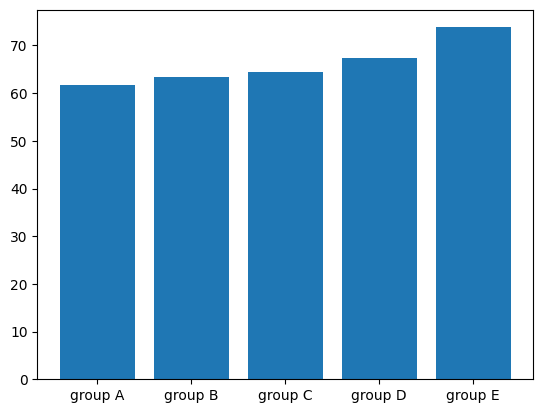

In [31]:
plt.bar(df["race/ethnicity"], df["math score"])
plt.show()

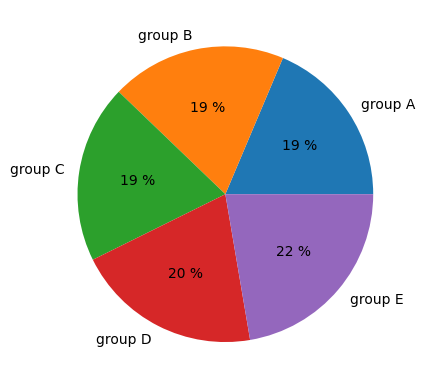

In [32]:
plt.pie(df["math score"], 
        labels=df["race/ethnicity"],
        autopct="%.0f %%") # Este es el formato de los numeros internos
plt.show()